**Q学習（Q-learning）**は、強化学習の代表的なアルゴリズムの一つで、エージェントが環境内で最適な行動を学習するための**オフポリシー型**のアルゴリズムです。エージェントは、行動を選んで報酬を得ながら、行動価値関数（**Q関数**）を更新していき、最適な方策を見つけることを目指します。

Q学習のアルゴリズムの大まかな流れとその背後にある理論を説明します。

### 1. **Q関数**
Q学習では、Q関数 \( Q(s, a) \) を用いて、状態 \( s \) で行動 \( a \) を取った場合に得られる期待リターンを表します。これは次のように定義されます：

\[
Q(s, a) = \mathbb{E}[G_t \mid s_t = s, a_t = a]
\]

ここで、\( G_t \) は時刻 \( t \) から将来にわたって得られる累積報酬です。エージェントはこのQ関数を更新しながら、どの状態でどの行動を取れば最大の報酬が得られるかを学習します。

### 2. **Q学習の更新ルール**
Q学習のアルゴリズムの中心は、次の**更新式**に基づいてQ関数を繰り返し改善していくことです。

\[
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left( r_{t+1} + \gamma \max_{a'} Q(s_{t+1}, a') - Q(s_t, a_t) \right)
\]

各項の意味は以下の通りです：
- \( Q(s_t, a_t) \) は現在の状態 \( s_t \) で行動 \( a_t \) を取ったときの行動価値。
- \( \alpha \) は**学習率**で、新しい情報をどの程度反映するかを決定します。値は \( 0 \leq \alpha \leq 1 \) の範囲で設定されます。
- \( r_{t+1} \) は次の状態に遷移した際に得られる**報酬**。
- \( \gamma \) は**割引因子**で、将来の報酬に対する重要度を調整します。
- \( \max_{a'} Q(s_{t+1}, a') \) は次の状態 \( s_{t+1} \) における全行動の中で最大のQ値（期待リターン）です。

この式に基づいて、エージェントは次の状態で得られる最大の将来の報酬（\( \max_{a'} Q(s_{t+1}, a') \)）を考慮しながら、現在のQ値を更新します。最終的に、すべての状態・行動ペア \( (s, a) \) に対してQ関数が最適化され、エージェントは最適な方策を導き出すことができます。

### 3. **探索と活用（Exploration vs Exploitation）**
Q学習では、既に知っている情報（Q値）を活用して最善の行動を選ぶ**活用（exploitation）**と、新しい状態・行動ペアを探索して知識を増やす**探索（exploration）**のバランスが重要です。

- **ε-greedy方策**：エージェントが行動を選ぶ際、一定の確率 \( \varepsilon \) でランダムな行動を選び、残りの確率 \( 1 - \varepsilon \) では現在のQ値が最大となる行動を選択します。この方策により、新しい行動や状態を探索しつつ、学習した知識を活用して報酬を最大化します。

### 4. **Q学習のアルゴリズムの流れ**
Q学習の基本的なアルゴリズムの流れは以下の通りです。

1. **初期化**：すべての状態 \( s \) と行動 \( a \) に対して、Q値 \( Q(s, a) \) をランダムに初期化します（通常は0にします）。
2. **状態の観測**：環境の初期状態 \( s_t \) を観測します。
3. **行動選択**：ε-greedy方策を用いて、行動 \( a_t \) を選択します。
4. **報酬と次状態の観測**：選択した行動 \( a_t \) を実行し、その結果として得られる報酬 \( r_{t+1} \) と次の状態 \( s_{t+1} \) を観測します。
5. **Q値の更新**：更新式に基づいて \( Q(s_t, a_t) \) を更新します。
6. **状態の更新**：次の状態 \( s_{t+1} \) に遷移し、3に戻ります。
7. **終了条件の確認**：エピソード終了や目標達成などの条件に達するまで、上記のプロセスを繰り返します。

### 5. **Q学習の特徴**
- **オフポリシー学習**：Q学習は、方策に関係なく、最適なQ関数を学習できるオフポリシーの手法です。エージェントは探索中に行動がランダムでも、最終的には最適な方策を学習します。
- **学習効率**：環境が大きい場合や、連続的な状態・行動空間では、Q学習の計算量が増大するため、Q値の関数近似（例えばディープラーニングを用いた**Deep Q-Learning**）が必要になることがあります。

### まとめ
Q学習は、環境からの報酬をもとに、Q関数を更新していく強化学習アルゴリズムです。Q関数は、状態と行動のペアに対する価値を表し、最終的にすべての状態・行動ペアに対して最適な方策を学習します。探索と活用のバランスを保ちながら、未来の報酬を考慮してQ値を更新し、長期的に最適な報酬を得られる行動を選ぶことが目指されます。

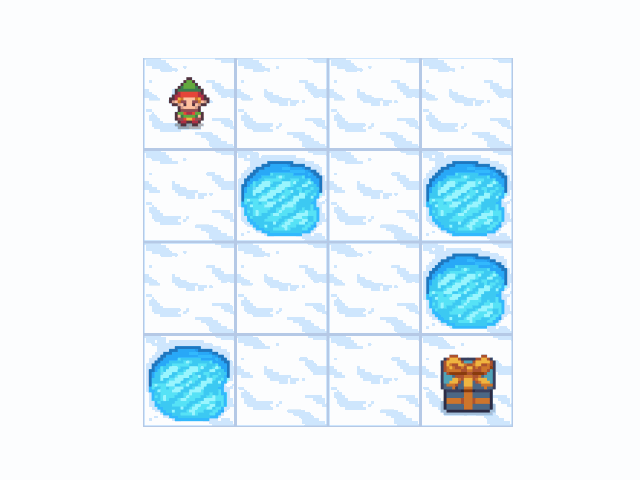

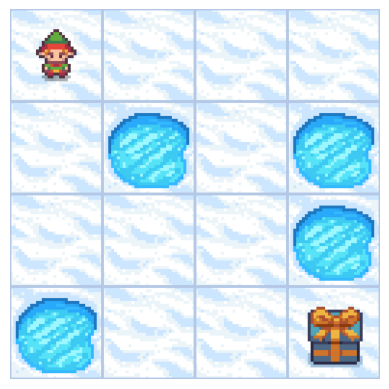

In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image


env = gym.make("FrozenLake-v1", is_slippery=True, render_mode='rgb_array')

q_table = np.zeros([env.observation_space.n, env.action_space.n])

alpha = 0.1 
gamma = 0.99 
epsilon = 0.1
episodes = 3000 
max_steps = 100 

def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

for episode in range(episodes):
    state, _ = env.reset()
    
    for step in range(max_steps):
        action = choose_action(state, epsilon)
        
        next_state, reward, done, _, _ = env.step(action)
        
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        td_error = td_target - q_table[state][action]
        q_table[state][action] += alpha * td_error
        
        state = next_state
        
        if done:
            break

frames = []
def generate_frames():
    state, _ = env.reset()
    frames.append(env.render())
    done = False
    
    for step in range(max_steps):
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        
        frames.append(env.render())
        
        state = next_state
        
        if done:
            break

generate_frames()

fig = plt.figure()
plt.axis('off')

def update_frame(i):
    plt.imshow(frames[i])

anim = animation.FuncAnimation(fig, update_frame, frames=len(frames), interval=200)
anim.save("frozenlake_animation.gif", writer="pillow", fps=5)

with open("frozenlake_animation.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))